## Predicting Customer Churn

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Custom module imports
import acquire
import prepare
import explore
# from model import score_models

### Project Planning

- Project Description
Telco is attempting to figure out the drivers of churn amongst its customers. Churn is defined as when a customer leaves the company.

- Goals
    - Find drivers for customer churn at Telco.
    - Construct a ML classification model that accurately predicts customer churn.
    - Provide my findings and takeaways in a report.
    
- Pipeline Tasks
    - Acquiring the data from the codeup database
    - Taking appropriate steps to clean the dataset
    - Splitting the data into train, validate and test dataframes
    - Exploring the data to aid in feature selection
    - Creating and fitting models utilizing various classification algorithms on in sample data
    - Testing the models' accuracies on out of sample data (i.e. the validate split)
    - Selecting the best performing model and evaluating its performance on the test split
    
- Data Dictionary

- Starting Hypotheses
- Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
- Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- Establish a baseline accuracy and document well.
- Train three different classification models.
- Evaluate models on train and validate datasets.
- Choose the model with that performs the best and evaluate that single model on the test dataset.
- Create csv file with the customer id, the probability of the target values, and the model's prediction for each observation in my test dataset.
- Document conclusions, takeaways, and next steps in the Final Report Notebook.

### Executive Summary - Conclusions & Next Steps¶


- I found that all of the classification models I created, LogisticRegression, DecisionTree, RandomForest, and KNeighbors predicted the species of Iris equally well using the features sepal_width, sepal_length, petal_length, petal_width.
- I chose my DecisionTree model as my best model with a 90% accuracy rate for predicting my target value, species. This model outperformed my baseline score of 33% accuracy, so it has value.
- Some initial exploration and statistical testing revealed that engineering some new features like petal area or sepal area might help my models predict with even more accuracy, and with more time, I would like to test this hypothesis.

### Acquire Data



In [51]:
# add table with labels

In [4]:
# set options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# read telco data into a dataframe
telco_df = acquire.get_telco_data()
# telco_df.head()

In [6]:
# describes the df, object and numeric cols
acquire.get_data_summary(telco_df)

The telco dataframe has 7043 rows and 24 columns .

There are total of 0 missing values in the entire dataframe.

 Here are the first 5 rows of our dataset 

   payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 3  0016-QLJIS   
1                4                         1                 3  0017-DINOC   
2                3                         1                 3  0019-GFNTW   
3                4                         1                 3  0056-EPFBG   
4                3                         1                 3  0078-XZMHT   

   gender  senior_citizen partner dependents  tenure phone_service  \
0  Female               0     Yes        Yes      65           Yes   
1    Male               0      No         No      54            No   
2  Female               0      No         No      56            No   
3    Male               0     Yes        Yes      20            No   
4    Male              

Name: monthly_charges, dtype: int64
-------------------

proportions of monthly_charges

20.05     0.008661
19.85     0.006389
19.95     0.006247
19.90     0.006247
20.00     0.006105
19.65     0.006105
19.70     0.006105
19.55     0.005679
20.15     0.005679
19.75     0.005537
20.25     0.005537
20.35     0.005395
19.80     0.005395
19.60     0.005253
20.10     0.005253
20.20     0.004969
19.50     0.004544
19.40     0.004402
20.45     0.004402
20.40     0.004260
20.50     0.003976
19.45     0.003976
20.30     0.003976
20.55     0.003834
19.35     0.003550
19.30     0.003408
20.65     0.003266
25.25     0.002840
25.10     0.002698
19.25     0.002556
19.20     0.002414
20.75     0.002414
84.80     0.002414
25.00     0.002414
74.40     0.002272
81.00     0.002130
24.80     0.002130
20.85     0.002130
24.45     0.002130
20.60     0.002130
25.15     0.001988
79.20     0.001988
70.15     0.001988
80.45     0.001988
25.05     0.001988
79.85     0.001988
80.85     0.001846
20.70     0.001846

### Acquire Takeaways:
- Churn is our target variable
- payment_type_id == payment type. We will keep the payment type id column since that is numeric
- We will encode payment type to show the different payment types as numeric
- internet_service type id column is the same as internet service type column. We will keep the internet service type id column since that is numeric
- contract type id column is the same as contract type column. We will keep the contract type id column since that is numeric  and encode the contract type column to check for each contract category
- binary categorical columns like gender, partner, dependents will have to be encoded to be numeric
- total charges column has an object dtype - will have to change to float
- customer id column is not particulary useful but since we need to provide predictions using customer id we will keep it
- Some customers had no total charges -  this was where the tenure was 0 so must be new customers

### Prepare Data

In [7]:
train, validate, test = prepare.prep_telco_data(telco_df)

There are no duplicate rows in your dataset.
----------------
Total charges has been converted from object to a float data type.
----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5642 to 6840
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   payment_type_id        3943 non-null   int64  
 1   customer_id            3943 non-null   object 
 2   senior_citizen         3943 non-null   int64  
 3   tenure                 3943 non-null   int64  
 4   monthly_charges        3943 non-null   float64
 5   total_charges          3943 non-null   float64
 6   en_contract_type       3943 non-null   int64  
 7   en_multiple_lines      3943 non-null   int64  
 8   en_has_fiber           3943 non-null   int64  
 9   en_has_DSL             3943 non-null   int64  
 10  has_internet           3943 non-null   int64  
 11  en_online_security     3943 non-null   int64  
 12  en_online_b

#### Prepare Takeaways:
- There are no duplicates in the dataset
- I dropped the column
- I changed the total charges which were empty to null values and then replaced them with the same value as the monthly charges for new customers.
- Then I changed total charges to a float
- Encoded categorical variables
- Split the data set into train, validate and test

## Explore Data

In [8]:
# setting rc parameters for visualizations
plt.rc('font', size=14)
plt.rc('figure', figsize=(14, 8))

In [9]:
# checking overall churn across all customers in train split
train.churned.value_counts()

0    2897
1    1046
Name: churned, dtype: int64

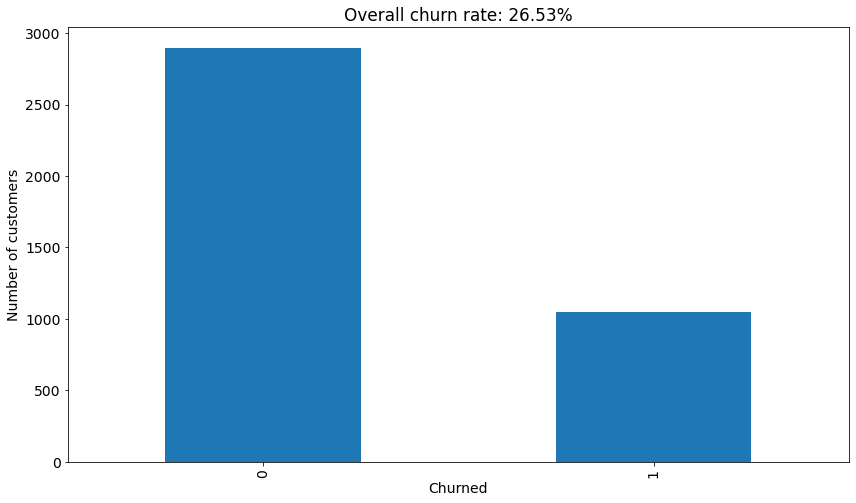

In [10]:
# visualizing overall churn rate
train.churned.value_counts().sort_index().plot.bar()
churn_rate = train.churned.mean()
plt.title(f'Overall churn rate: {churn_rate:.2%}')
plt.xlabel('Churned')
plt.ylabel('Number of customers')
plt.show()

#### Takeaways:
- Overall churn rate is not very high
- However, we want to explore ways to reduce churn so we can increase customer retention

In [11]:
# Define Categorical variables 
cat_vars = ['payment_type_id','senior_citizen','en_contract_type',
'en_multiple_lines','en_has_fiber','en_has_DSL','has_internet',
'en_online_security','en_online_backup','en_device_protection',
'en_tech_support','en_streaming_tv','en_streaming_movies',
'gender_female','has_partner','has_dependents','has_phone_service',
'has_paperless_billing']

In [12]:
# Define quantitative variables
quant_vars = ['monthly_charges','total_charges','tenure']

Frequency table of payment_type_id
   payment_type_id  Count  Percent
1                4   1320    33.48
2                3    892    22.62
3                1    879    22.29
4                2    852    21.61


Frequency table of senior_citizen
   senior_citizen  Count  Percent
0               0   3303    83.77
1               1    640    16.23


Frequency table of en_contract_type
   en_contract_type  Count  Percent
0                 2   2162    54.83
2                 1    974    24.70
1                 0    807    20.47


Frequency table of en_multiple_lines
   en_multiple_lines  Count  Percent
0                  1   2277    57.75
1                  0   1666    42.25


Frequency table of en_has_fiber
   en_has_fiber  Count  Percent
0             0   2203    55.87
1             1   1740    44.13


Frequency table of en_has_DSL
   en_has_DSL  Count  Percent
0           0   2578    65.38
1           1   1365    34.62


Frequency table of has_internet
   has_internet  Count  Percent
1 

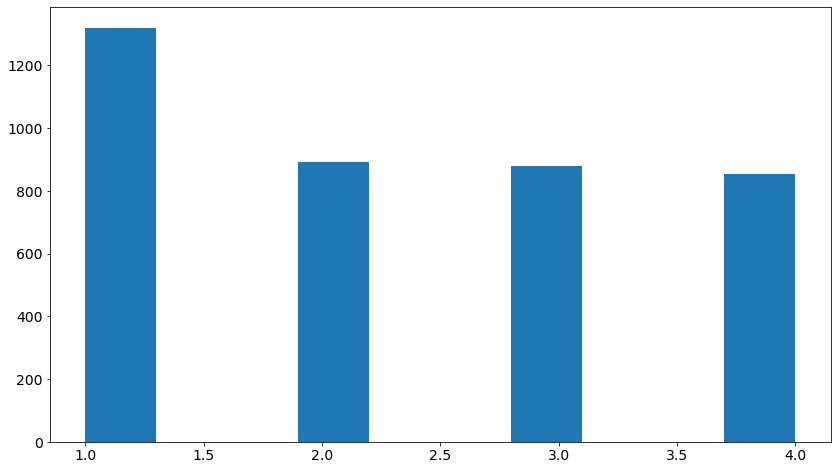

Bar Plot of senior_citizen


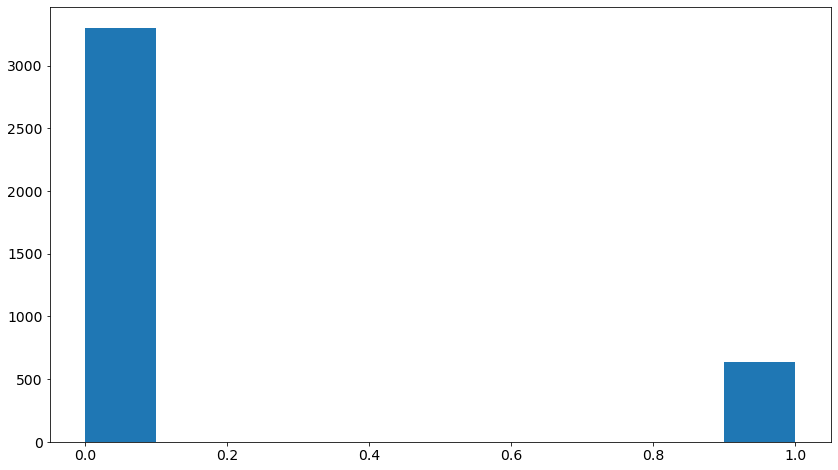

Bar Plot of en_contract_type


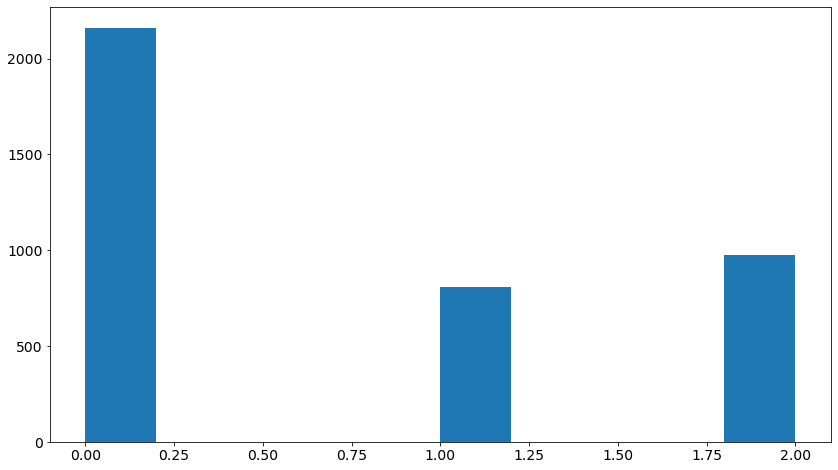

Bar Plot of en_multiple_lines


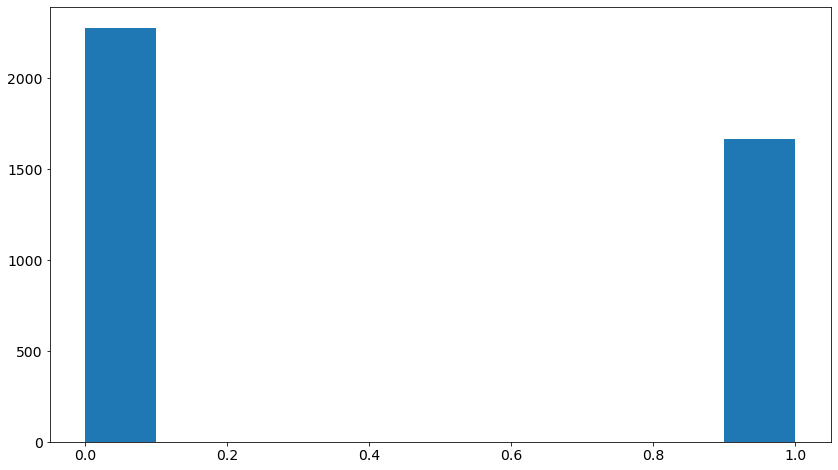

Bar Plot of en_has_fiber


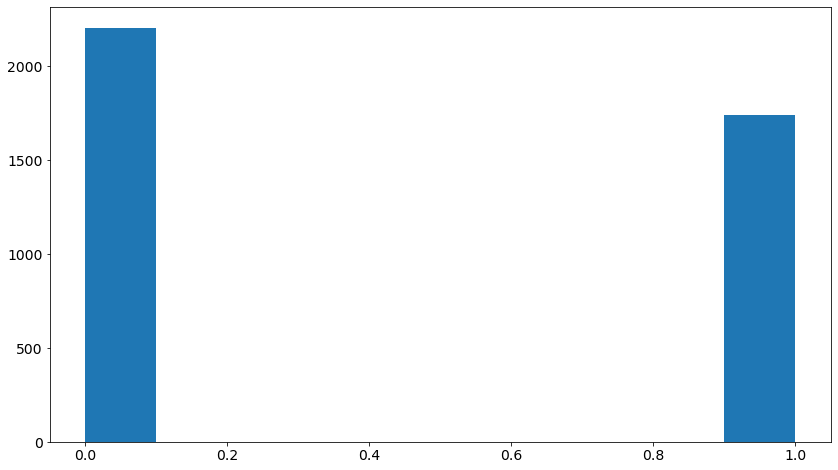

Bar Plot of en_has_DSL


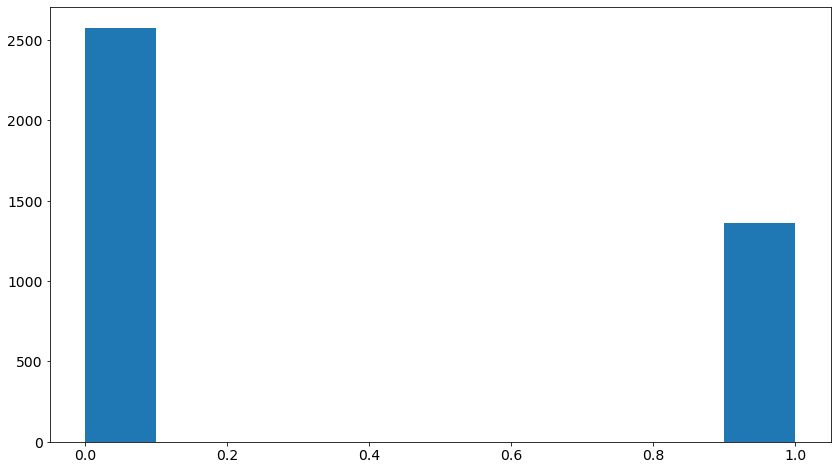

Bar Plot of has_internet


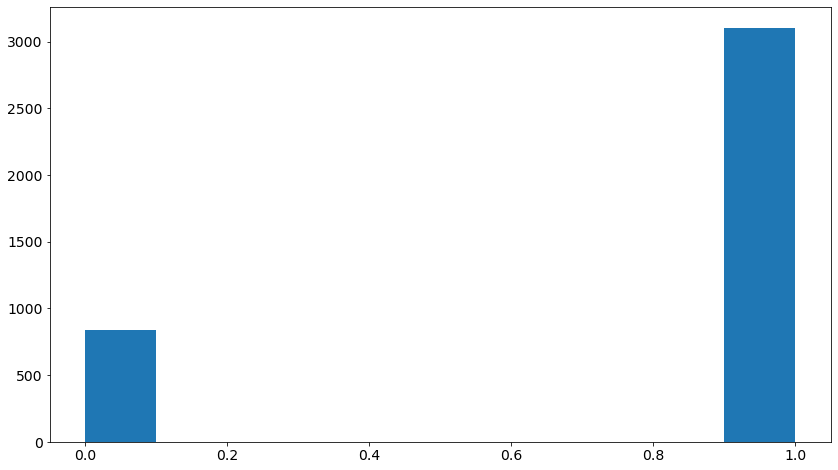

Bar Plot of en_online_security


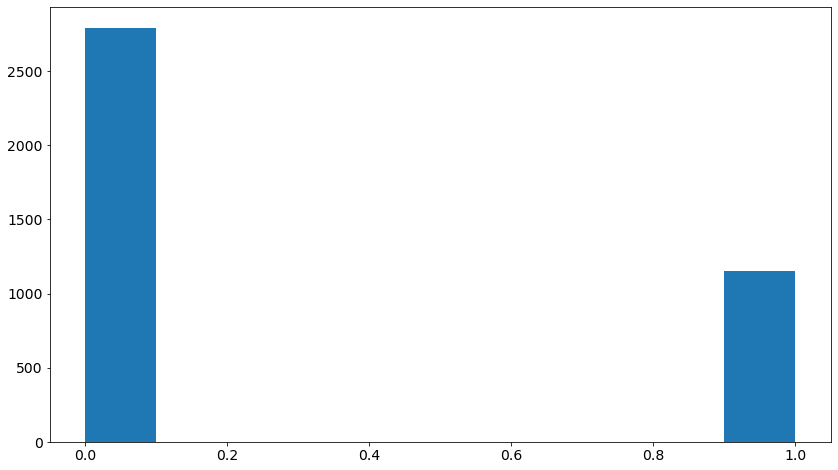

Bar Plot of en_online_backup


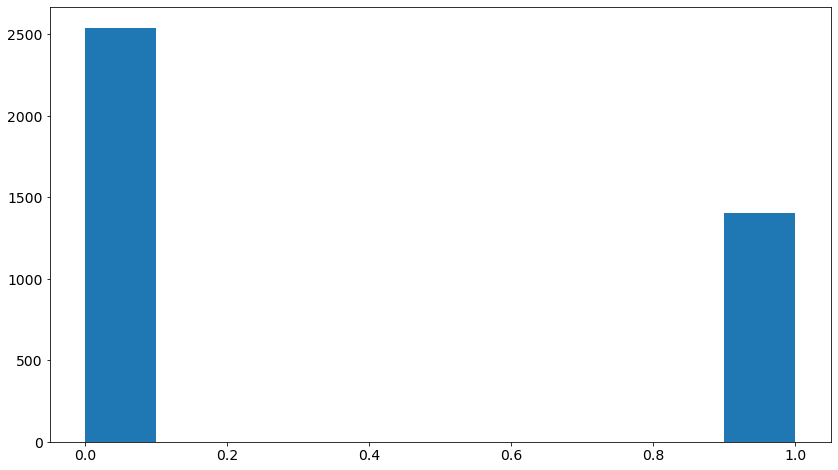

Bar Plot of en_device_protection


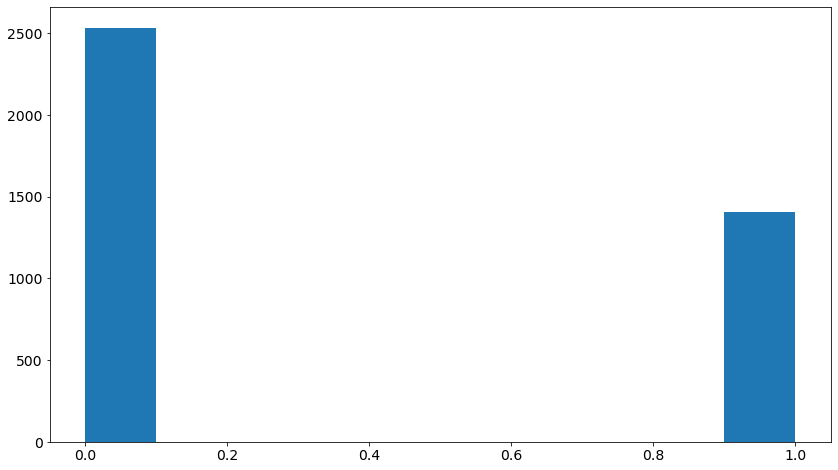

Bar Plot of en_tech_support


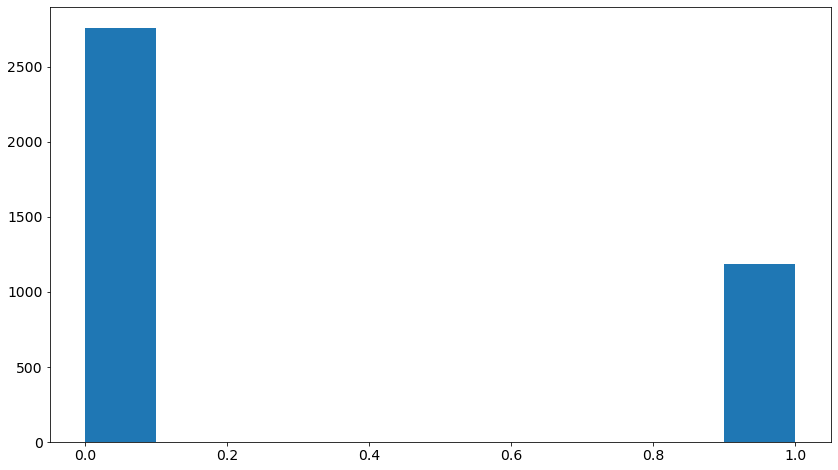

Bar Plot of en_streaming_tv


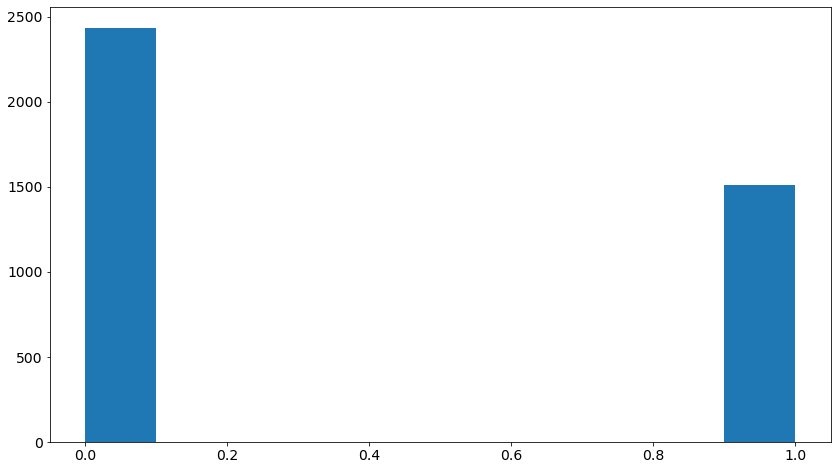

Bar Plot of en_streaming_movies


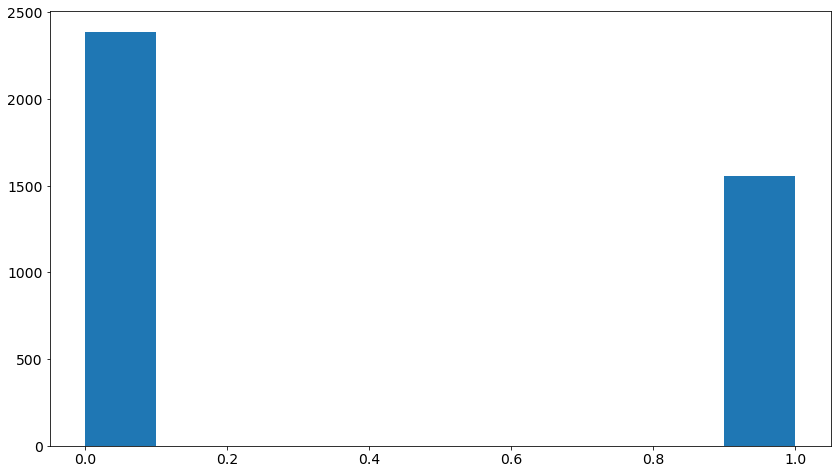

Bar Plot of gender_female


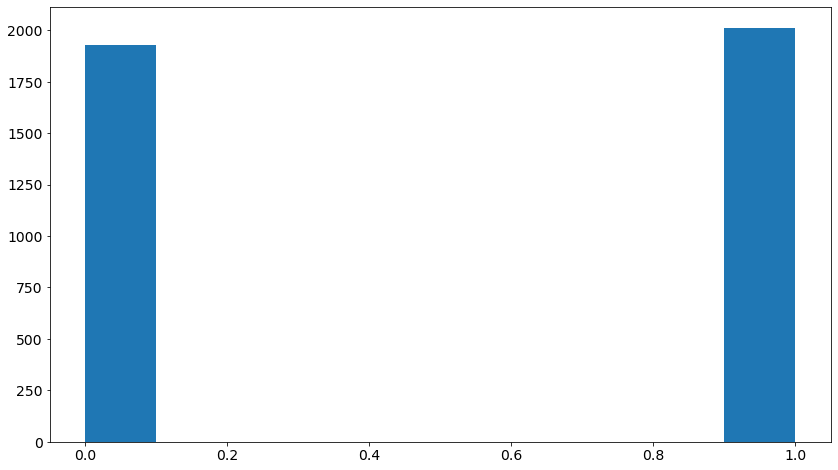

Bar Plot of has_partner


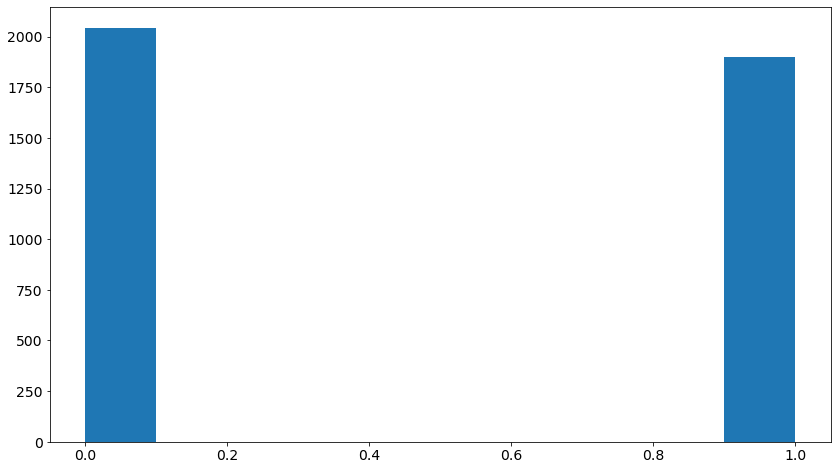

Bar Plot of has_dependents


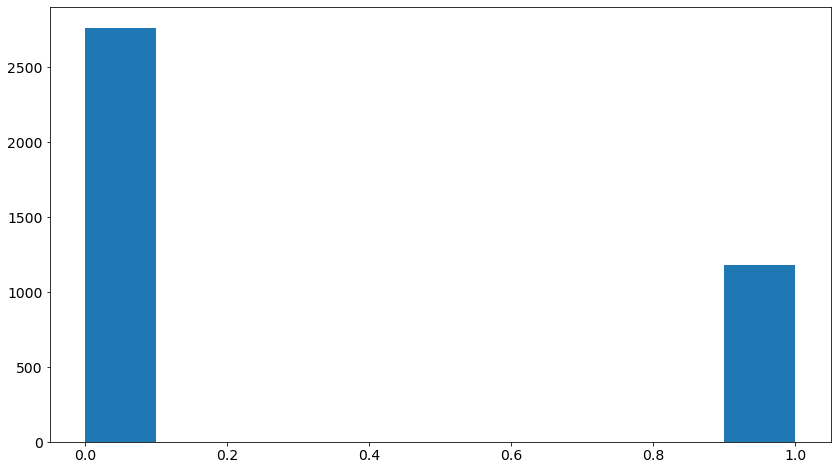

Bar Plot of has_phone_service


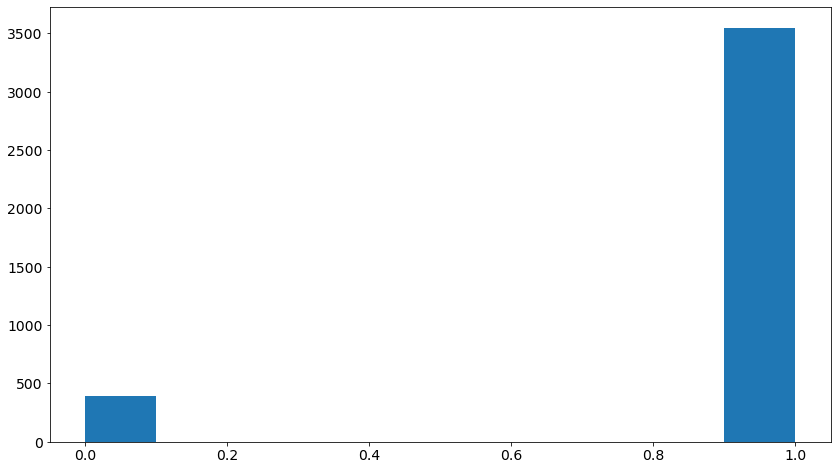

Bar Plot of has_paperless_billing


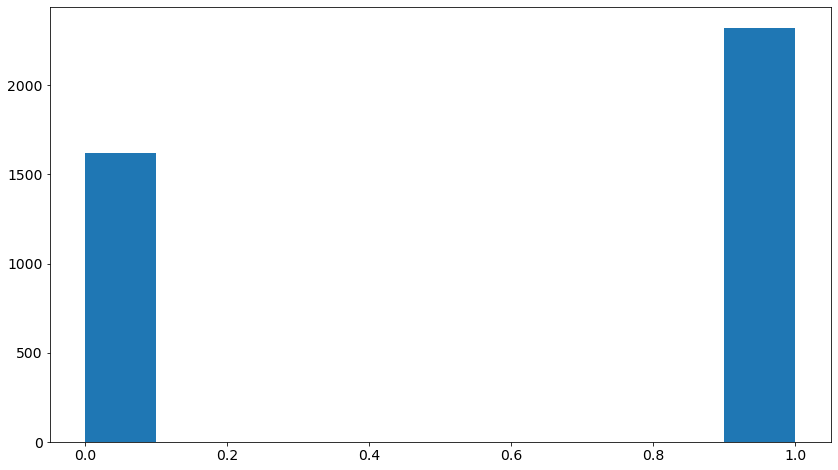

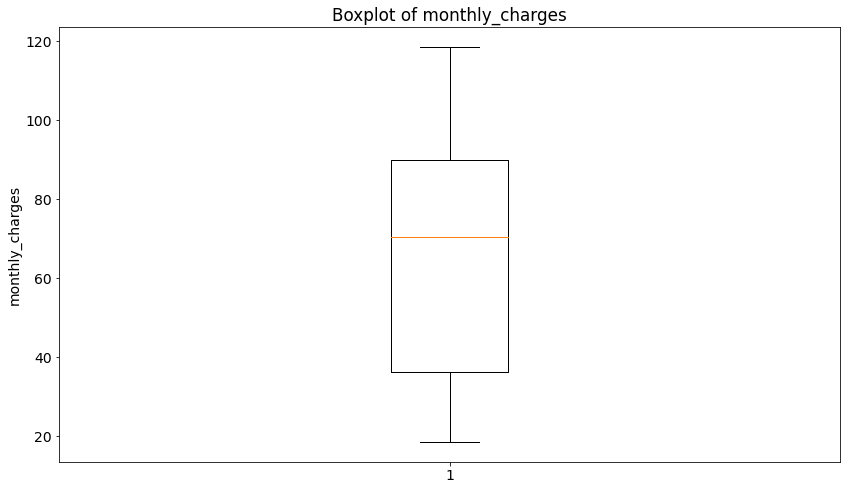

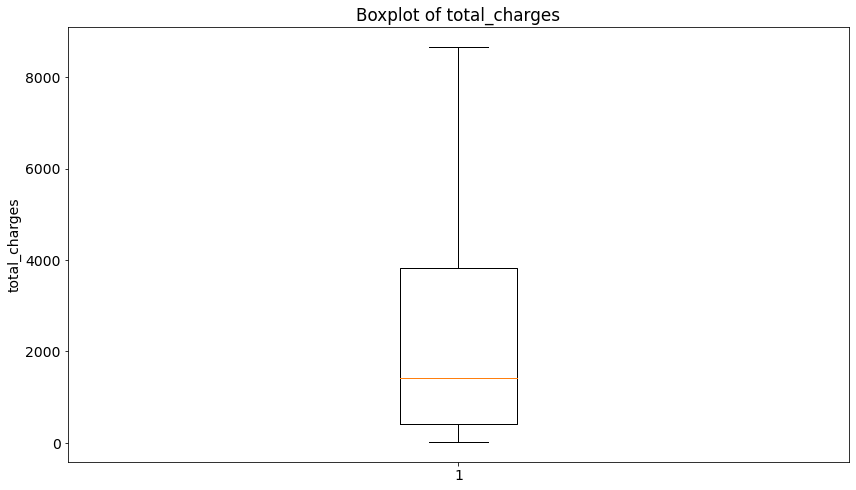

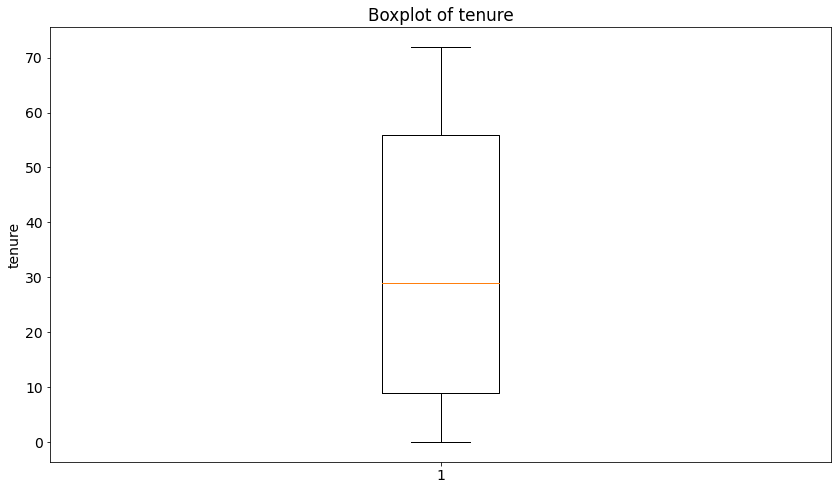

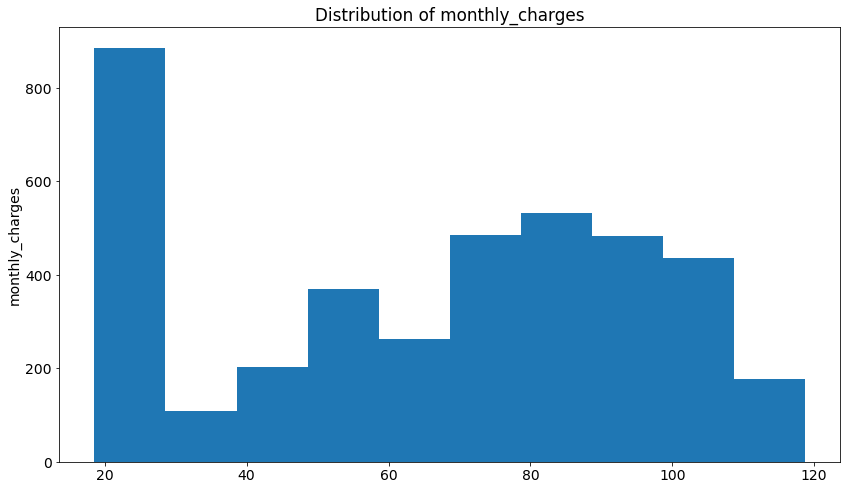

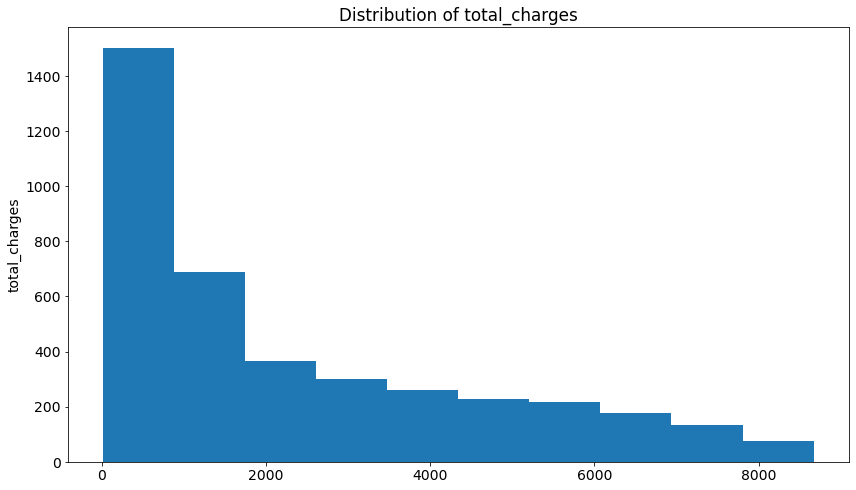

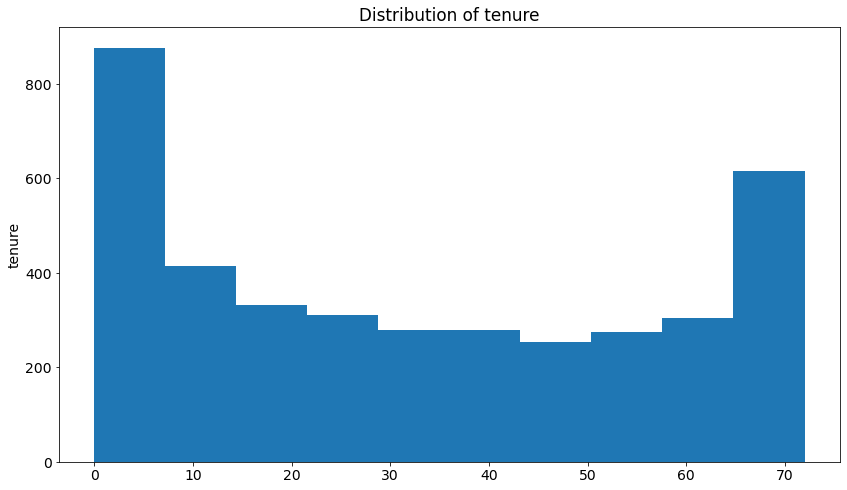

Summary Statistics of monthly_charges
count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


Summary Statistics of total_charges
count    3943.000000
mean     2310.686787
std      2275.714986
min        18.800000
25%       416.175000
50%      1415.000000
75%      3816.625000
max      8670.100000
Name: total_charges, dtype: float64


Summary Statistics of tenure
count    3943.000000
mean       32.673852
std        24.472862
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64




In [13]:
explore.explore_univariate(train, cat_vars, quant_vars)

# 33% customers use payment type 4, the rest are quite equal proportions
# 84% cust not senior citizens
# 54% cust have 2 yr contract
# fewest cust have month to month contract
# over 57% cust have multiple lines
# over 55% cust dont have fiber but 44% do
# 34% cust have dsl
# 78% cust dont have internet service
# 71% cust dont have online sec
# 64% cust dont have online_backup
# 64% cust dont have device_protection
# 70% cust dont have tech supp
# 62% cust dont have stream tv
# 61% cust dont have stream movies
# 51% cust are women
# 52% cust have partners
# 70% cust have dependents
# 90% cust have phone service
# 59% cust have paperless bill
# 27% cust churned

Frequency Table of payment_type_id
   payment_type_id  count  percent
1                4   1320    33.48
2                3    892    22.62
3                1    879    22.29
4                2    852    21.61
-------------------------------


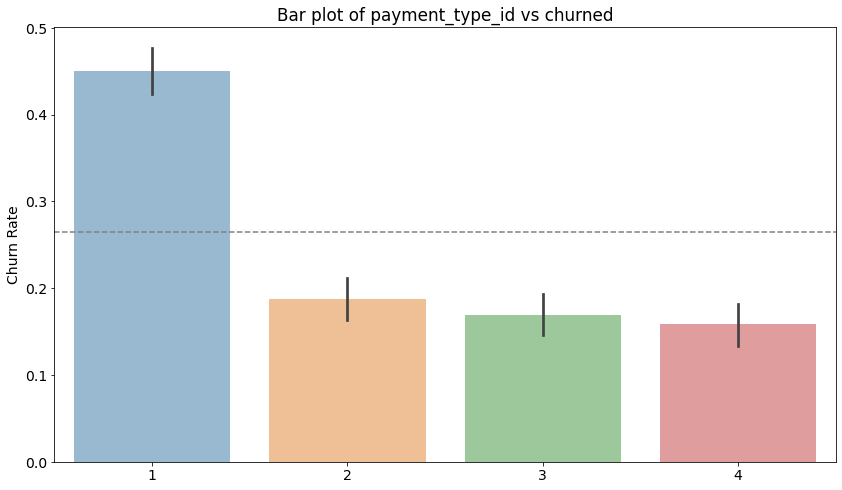

Frequency Table of senior_citizen
   senior_citizen  count  percent
0               0   3303    83.77
1               1    640    16.23
-------------------------------


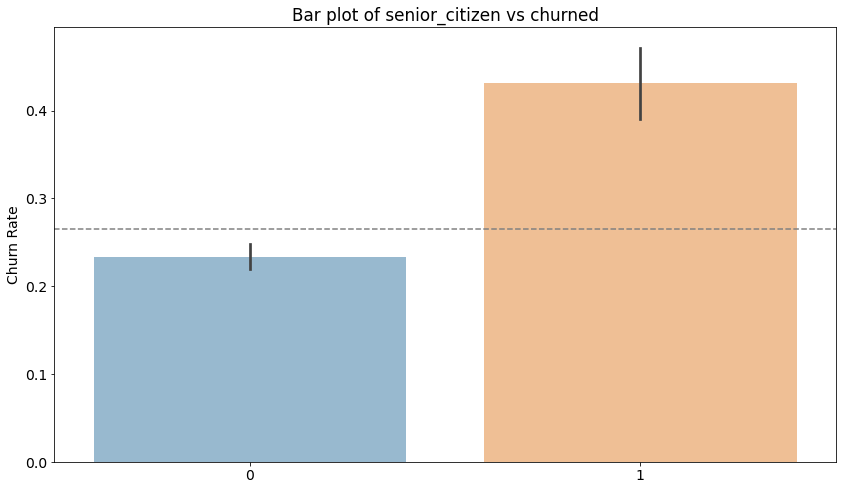

Frequency Table of en_contract_type
   en_contract_type  count  percent
0                 2   2162    54.83
2                 1    974    24.70
1                 0    807    20.47
-------------------------------


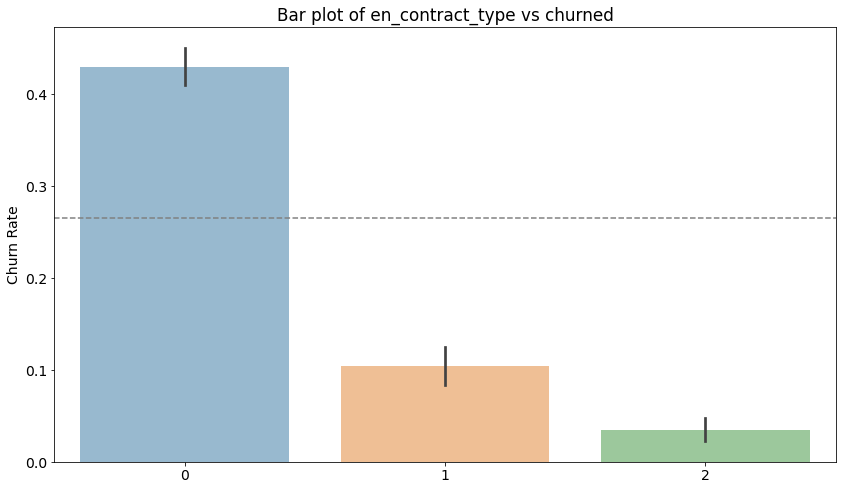

Frequency Table of en_multiple_lines
   en_multiple_lines  count  percent
0                  1   2277    57.75
1                  0   1666    42.25
-------------------------------


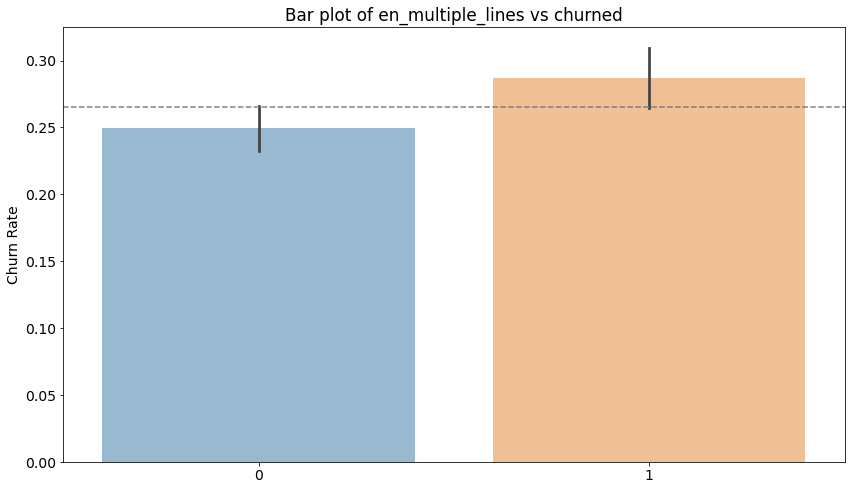

Frequency Table of en_has_fiber
   en_has_fiber  count  percent
0             0   2203    55.87
1             1   1740    44.13
-------------------------------


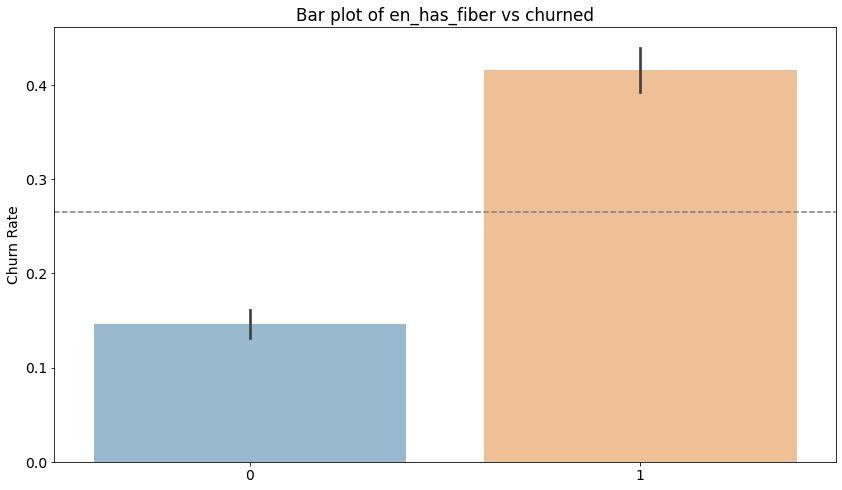

Frequency Table of en_has_DSL
   en_has_DSL  count  percent
0           0   2578    65.38
1           1   1365    34.62
-------------------------------


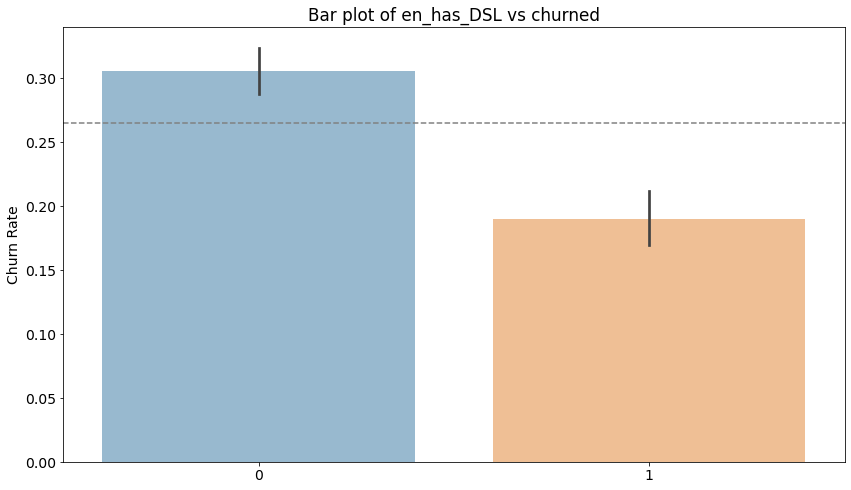

Frequency Table of has_internet
   has_internet  count  percent
1             0   3105    78.75
0             1    838    21.25
-------------------------------


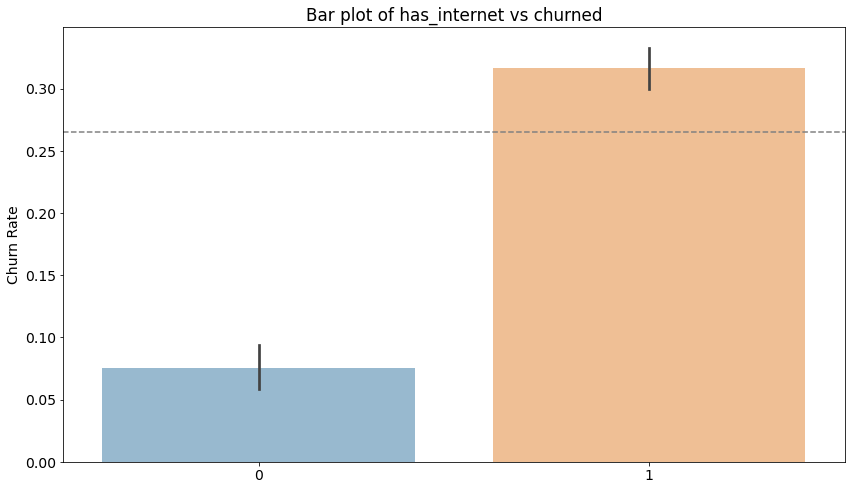

Frequency Table of en_online_security
   en_online_security  count  percent
0                   0   2794    70.86
1                   1   1149    29.14
-------------------------------


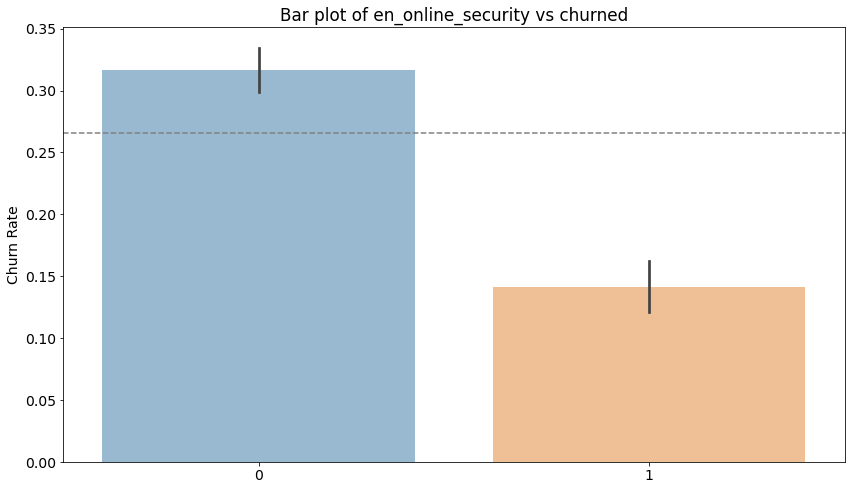

Frequency Table of en_online_backup
   en_online_backup  count  percent
0                 0   2541    64.44
1                 1   1402    35.56
-------------------------------


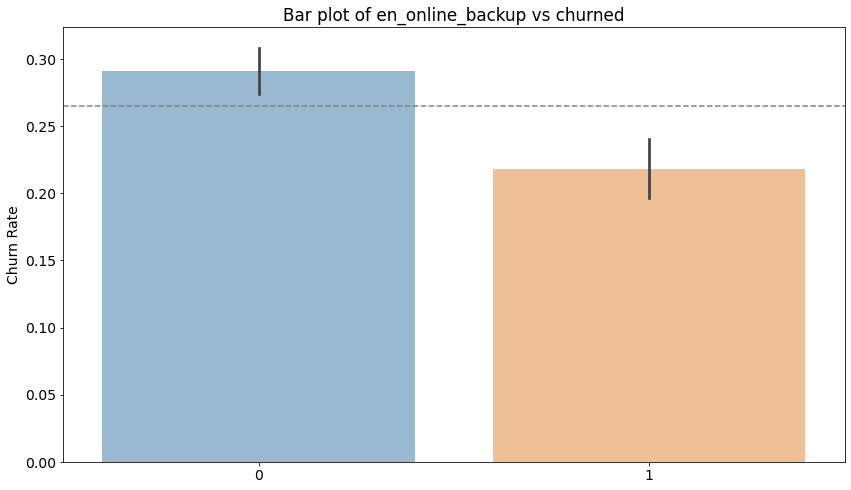

Frequency Table of en_device_protection
   en_device_protection  count  percent
0                     0   2534    64.27
1                     1   1409    35.73
-------------------------------


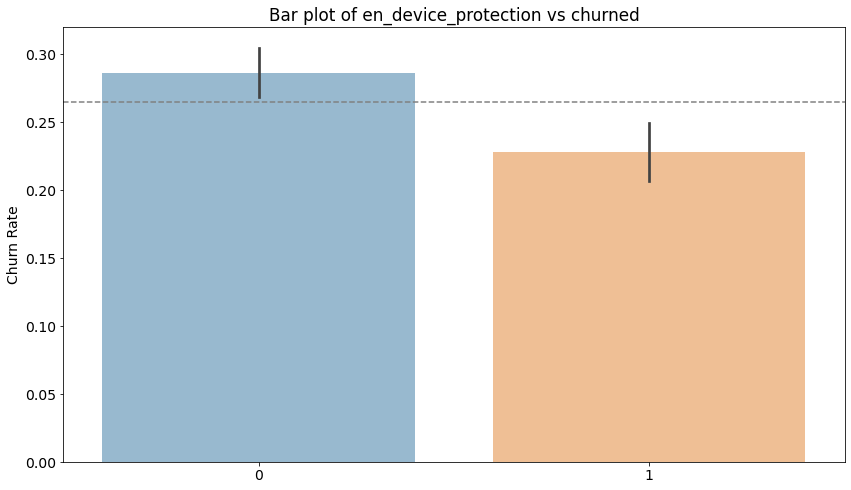

Frequency Table of en_tech_support
   en_tech_support  count  percent
0                0   2759    69.97
1                1   1184    30.03
-------------------------------


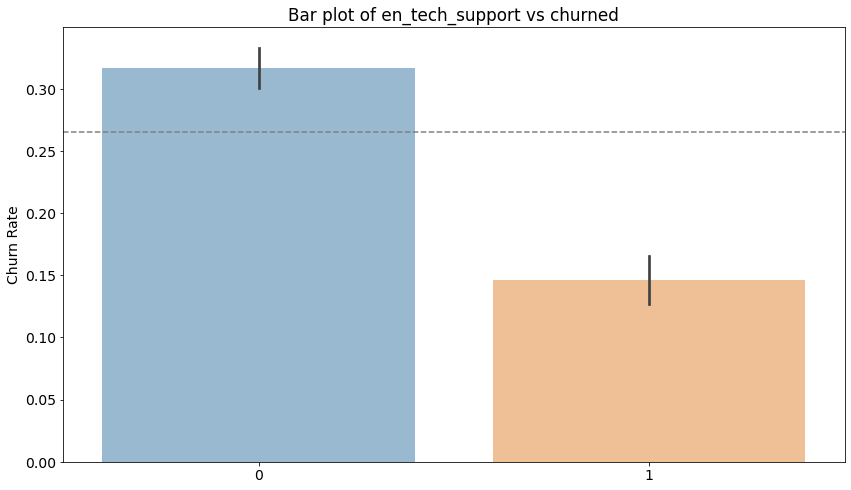

Frequency Table of en_streaming_tv
   en_streaming_tv  count  percent
0                0   2435    61.76
1                1   1508    38.24
-------------------------------


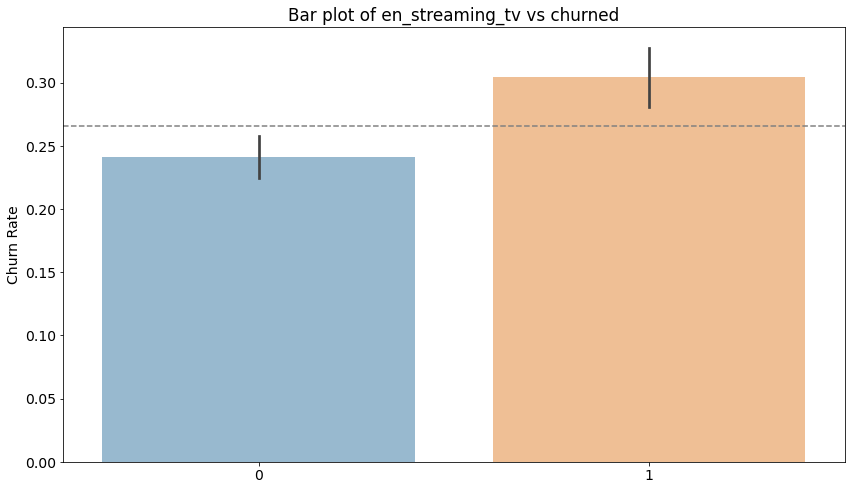

Frequency Table of en_streaming_movies
   en_streaming_movies  count  percent
0                    0   2389    60.59
1                    1   1554    39.41
-------------------------------


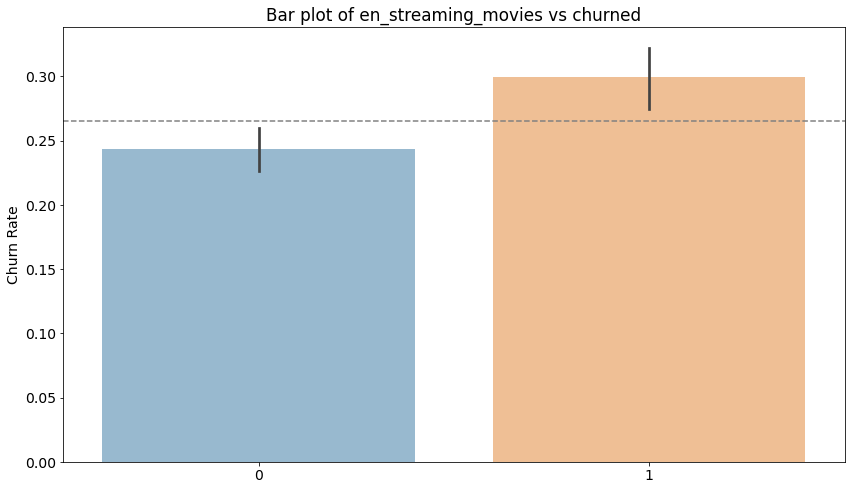

Frequency Table of gender_female
   gender_female  count  percent
1              0   2013    51.05
0              1   1930    48.95
-------------------------------


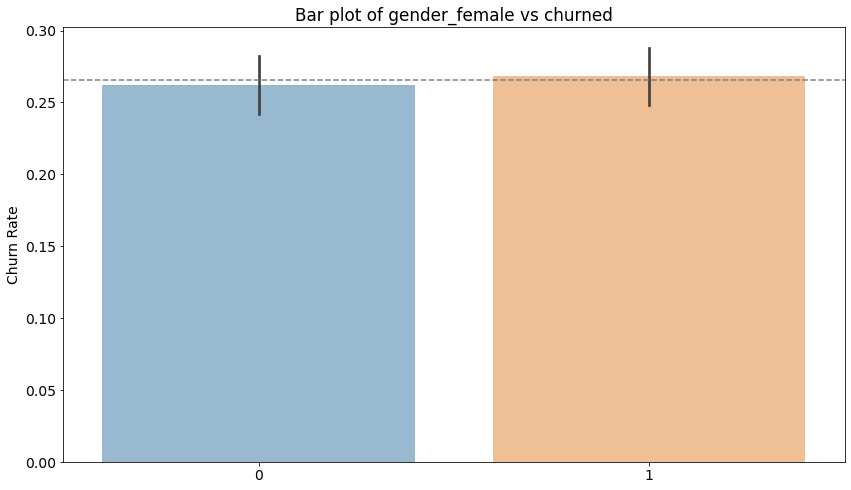

Frequency Table of has_partner
   has_partner  count  percent
0            1   2044    51.84
1            0   1899    48.16
-------------------------------


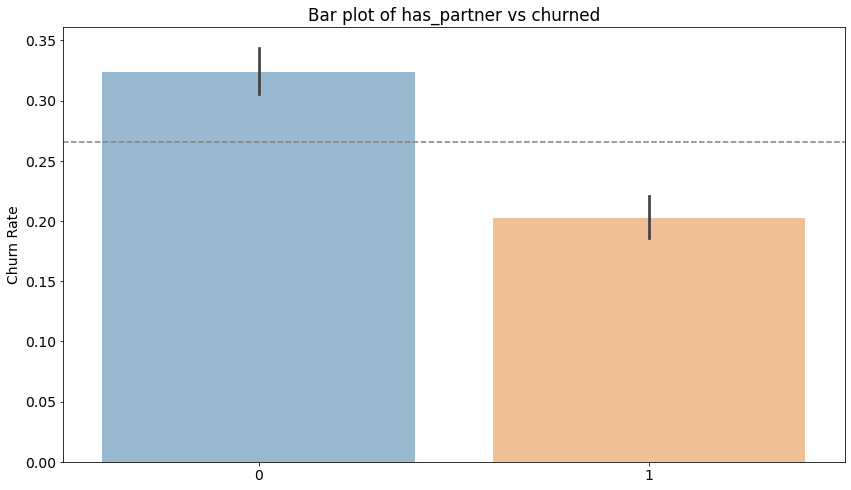

Frequency Table of has_dependents
   has_dependents  count  percent
0               1   2764     70.1
1               0   1179     29.9
-------------------------------


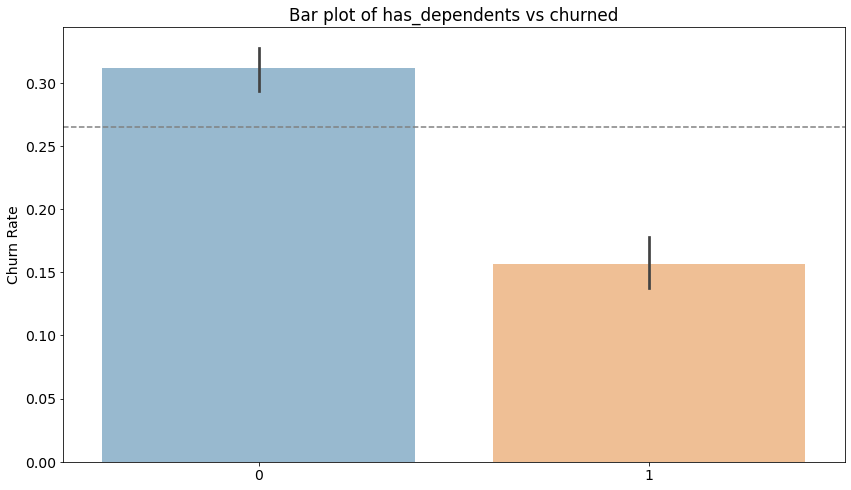

Frequency Table of has_phone_service
   has_phone_service  count  percent
1                  1   3550    90.03
0                  0    393     9.97
-------------------------------


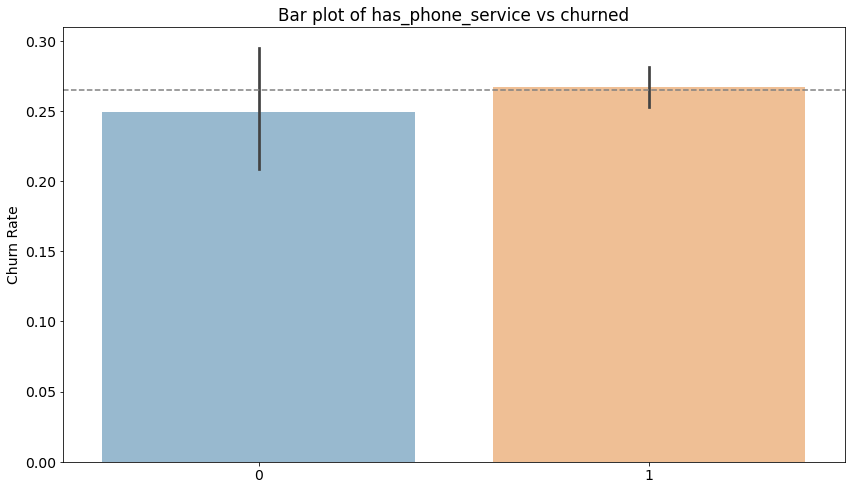

Frequency Table of has_paperless_billing
   has_paperless_billing  count  percent
1                      1   2324    58.94
0                      0   1619    41.06
-------------------------------


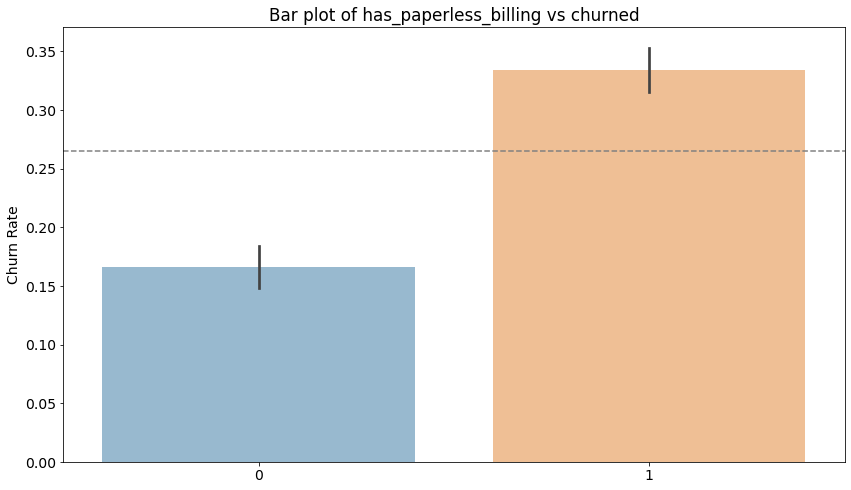

Distribution of monthly_charges


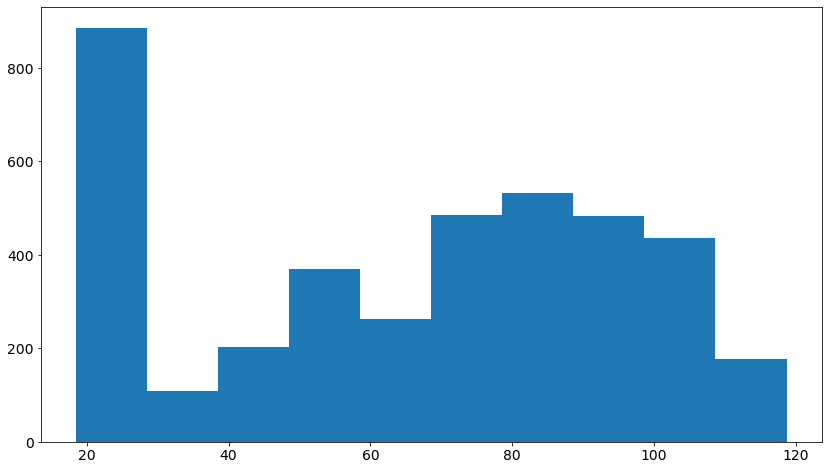

Summary Statistics for monthly_charges
count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


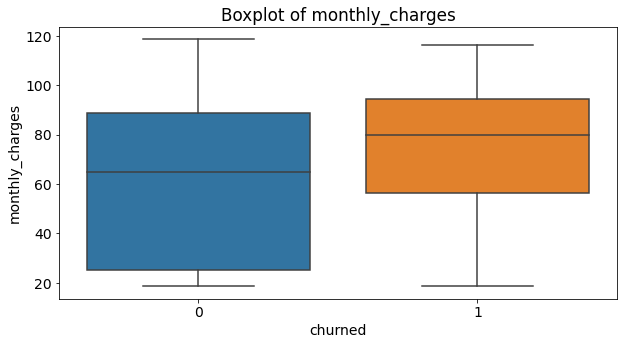

Distribution of total_charges


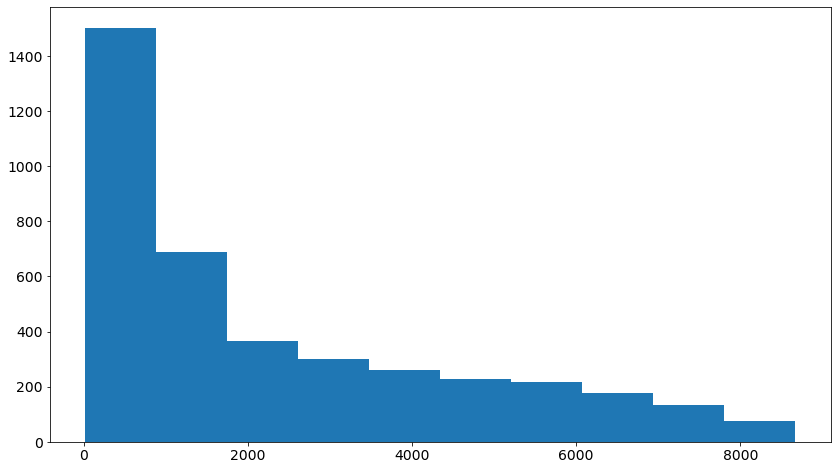

Summary Statistics for total_charges
count    3943.000000
mean     2310.686787
std      2275.714986
min        18.800000
25%       416.175000
50%      1415.000000
75%      3816.625000
max      8670.100000
Name: total_charges, dtype: float64


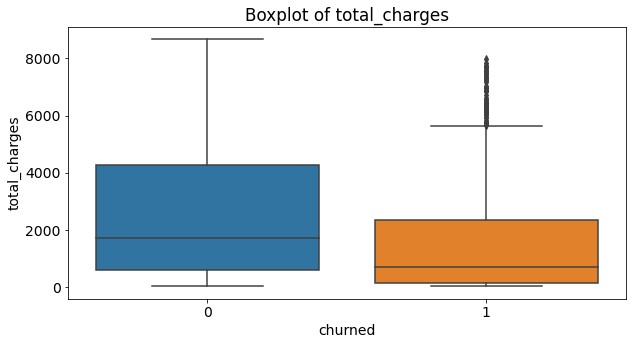

Distribution of tenure


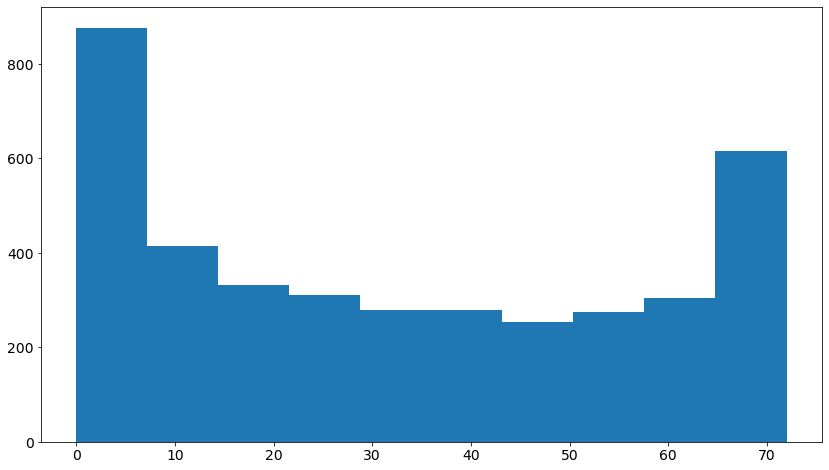

Summary Statistics for tenure
count    3943.000000
mean       32.673852
std        24.472862
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


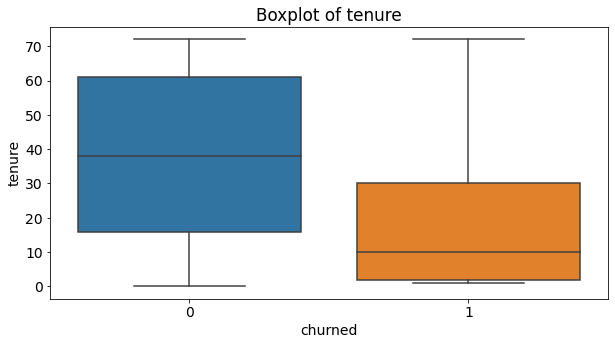

In [14]:
explore.explore_bivariate(train,'churned', cat_vars, quant_vars, alternative_h='two-sided')
# all pmt types except 1 have below avg churn rate
# most cust use pmt type 4
# most cust younger 
# Payment Type - Cust who pay by echeck (type1) have highest churn rate
# Sr citizen - seniors have higher churn rates than younger
# month to month contracts have highest churn rate
# multiple lines - not a huge diff betwen churn rate
# fiber cust have higher chrun rate >> countplot internet service type id to show higher churn for fiber
# dsl cust have lower churn than fiber
# cust who have internet service have a much higher churn rate
# cust without online security have a much higher churn rate
# cust with online backup have lower churn rates than those without
# cust without device protection churn more
# cust without tech support churn more
# cust who streamed tv churned more >> not huge diff
# cust who streamed movies churn more but not huge diff however could be significant
# no real diff between churn rates for gendr
# cust without partners have higher churn rates
# cust without dependents have higher churn rates
# cust with phone have higher churn rate but not a huge diff
# cust w/paperless bill have much higher churn rate than those without


### Explore Takeaways:
- 33% customers use payment type 4, the rest are quite equal proportions
- 84% cust not senior citizens
- 54% cust have 2 yr contract
- fewest cust have month to month contract
- over 57% cust have multiple lines
- over 55% cust dont have fiber but 44% do
- 34% cust have dsl
- 78% cust dont have internet service
- 71% cust dont have online sec
- 64% cust dont have online_backup
- 64% cust dont have device_protection
- 70% cust dont have tech supp
- 62% cust dont have stream tv
- 61% cust dont have stream movies
- 51% cust are women
- 52% cust have partners
- 70% cust have dependents
- 90% cust have phone service
- 59% cust have paperless bill
- 27% cust churned
- Distributions of tenure, monthly and total charges are not normal. However each variable has enough observations that based on clt we can assume the normality assumption has been met. 
- total charges seems right skewed - more customers with lower total charges
- Cutsomers who churn usually do so early in their tenure
- monthly charges for customers who churn seem to be higher than those who dont
- Customers who churn have short tenures

In [15]:
# sr cit
# pmt type
# phone ser
# most cust churn in the first few months
# total charges dist right skewed -  more customers with lower total charges
# from the boxplot looks like customers who churn have higher monthly charges
# 

In [34]:
train['en_contract_type'].value_counts()

0    2162
2     974
1     807
Name: en_contract_type, dtype: int64

In [41]:
# correlation with churn
corr_churned = pd.DataFrame(train.corr().churned.sort_values(ascending=False)).reset_index().rename(columns={'churned':'correlation w/churned', 'index':'variable'})
corr_churned


,variable,correlation w/churned
0,churned,1.000000
1,en_has_fiber,0.303591
2,has_internet,0.223698
3,monthly_charges,0.189040
4,has_paperless_billing,0.187409
5,senior_citizen,0.165482
6,en_streaming_tv,0.069691
7,en_streaming_movies,0.062017
8,en_multiple_lines,0.041917
9,has_phone_service,0.011995


Note:
highest corr: -40% contract type
Lowest corr: 0.7% gender_female

contract type, tenure, has fiber, payment type and has internet have the highest correlations with churn in the train df


In [40]:
# corr_mc = train.corr().monthly_charges.sort_values(ascending=False).reset_index().rename(columns={'monthly_charges':'correlation w/monthly charges', 'index':'variable'})
# corr_mc


,variable,corr w/monthly charges
0,monthly_charges,1.000000
1,en_has_fiber,0.787673
2,has_internet,0.759184
3,total_charges,0.651026
4,en_streaming_movies,0.628885
5,en_streaming_tv,0.626089
6,en_multiple_lines,0.501330
7,en_device_protection,0.481129
8,en_online_backup,0.448144
9,has_paperless_billing,0.344421


In [ ]:
Note: highest corr: -40% contract type Lowest corr: 0.7% gender_female

contract type, tenure, has fiber, payment type and has internet have the highest correlations with churn in the train df

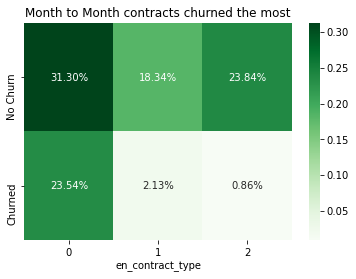

In [53]:
# Create crosstab with values as percentages of overall population
ctab = pd.crosstab(train.churned, train['en_contract_type'], normalize=True)

# Use crosstab object in a heatmap to visualize values.
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.2%')

plt.title('Month to Month contracts churned the most')
plt.ylabel('')

# Change labels for y-tick marks.
locs, labels = plt.yticks()
plt.yticks(locs, ('No Churn', 'Churned'))


plt.show()

<AxesSubplot:title={'center':'As tenure increases, churn rate decreases'}, xlabel='Tenure in months', ylabel='Churn Rate'>

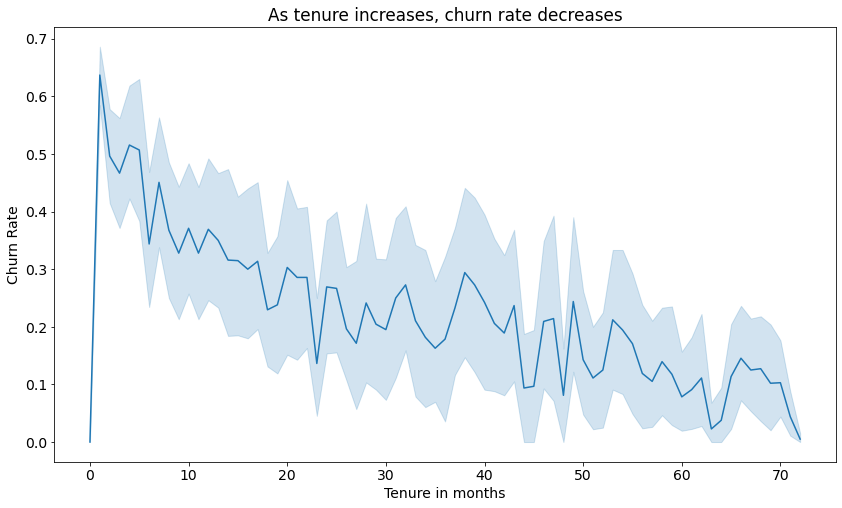

In [16]:
plt.title('As tenure increases, churn rate decreases')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure in months')
sns.lineplot(x='tenure',y='churned', data=train)

Takeaways:
    
  - Highest churn rate in the first few months of tenure
  - Churn rate is the lowest at the highest tenure
  - Churn rate reduces as tenure increase -  there are some increases at 24 and 40 -50 months tenure
      - These could be due to 2 year contract customers churning when their contract ends

In [17]:
# plt.title("Tenure in years vs Rate of Churn", fontsize=17)
# ax = sns.lineplot(x="yearly_tenure", y="churn_encoded", data=train, color="green")
# plt.ylabel('Churn Rate')
# yearly tenure

# Statistical Analysis

Features of Interest:
- payment_type_id
- senior_citizen
- en_contract_type
- en_has_fiber
- has_internet
- tenure
- monthly_charges
- total_charges

# Monthly Charges

- 1 tailed t test

### Setting Hypothesis
$H_{0}$: Mean monthly charges of customers who churned = Mean of monthly charges of all customers

$H_{a}$: Mean monthly charges of customers who churned > Mean of monthly charges of all customers

### Set Alpha
Confidence level = 0.99
Alpha = 1 - Confidence level = 0.01

### Verify Assumptions
- Normal Distribution

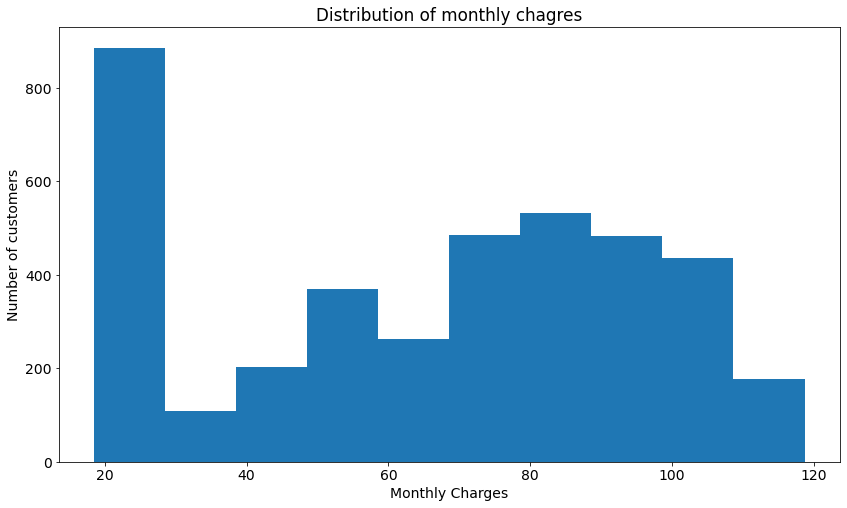

In [22]:
# plot distribution of montly charges

plt.title('Distribution of monthly charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.hist(train.monthly_charges)
plt.show()

In [23]:
# check number of observations
train.monthly_charges.shape

(3943,)

Note:
    Although the monthly charges are not normall distributed there are more than 30 observations 
    so we can assume the distribution is normal based on Central Limit Therorem.

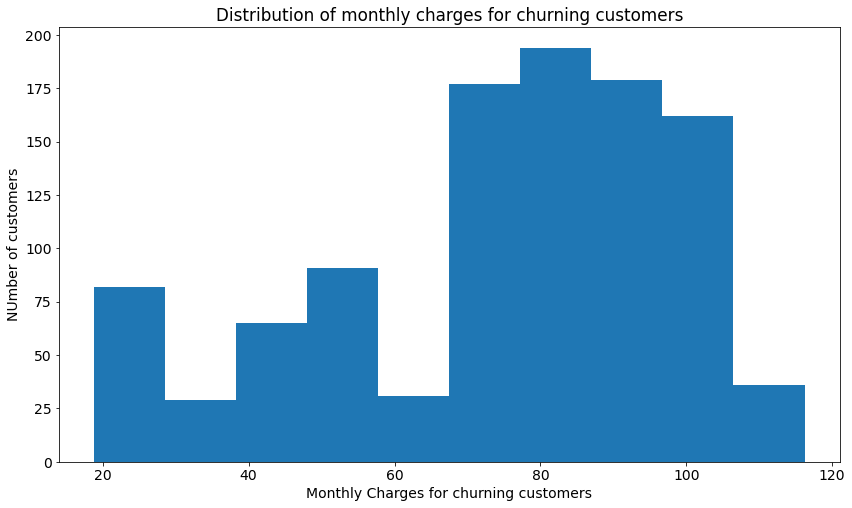

In [26]:
# plot distribution of montly charges for customer who churn

churn_sample = train[train.churned== 1].monthly_charges
churn_sample.hist()
plt.title('Distribution of monthly charges for churning customers')
plt.ylabel('NUmber of customers')
plt.xlabel('Monthly Charges for churning customers')
plt.grid(False)
plt.show()

In [28]:
train.churned.value_counts()
# number of churning customers is greater than 30 so we can assume normality is met

0    2897
1    1046
Name: churned, dtype: int64

Note:
    
Although t he disttribtutions are not normal, the churn sample as well as the train split is large enough to meet the assumptions of normal distributions based on CLT.

#### Compute test statistic and probability (t-statistic & p-value)
scipy.stats.ttest_1samp For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼 and 𝑡 > 0.

In [30]:
# calculate t and p statistic
churn_sample = train[train.churned== 1].monthly_charges
overall_mean = train.monthly_charges.mean()
alpha = 0.01

t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p/2, alpha

(12.411208836102778, 2.1483628461896314e-33, 0.01)

In [31]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis


#### Takeaway:

    Based on our confidence level, we can say that if this experiment was repeated multiple times, 99% of the times we would find that the mean monthly charges for churning customers are significantly higher than the overall mean monthly charges.

## Having Fiber Optic Internet

- chi sq test

### Setting Hypothesis
$H_{0}$: Churn Rate is independent of having fiber optic internet

$H_{a}$: Churn Rate is dependent on having fiber optic internet

### Set Alpha
Confidence level = 0.99
Alpha = 1 - Confidence level = 0.01

### Verify Assumptions
- the samples are independent

In [34]:
# Create crosstab
observed = pd.crosstab(train.en_has_fiber, train.churned)
observed

churned,0,1
en_has_fiber,,
0,1881,322
1,1016,724


In [35]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [40]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
print(f'degrees of freedom: {degf}')
print('~~~~~~~~~~~~~~~~~~~~~~')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis.
We can suggest churn rate is not independent of having fiber optic internet''')
else:
    print('We cannot reject the null hypothesis')

Observed:

churned          0    1
en_has_fiber           
0             1881  322
1             1016  724
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

churned                 0           1
en_has_fiber                         
0             1618.587624  584.412376
1             1278.412376  461.587624
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 362.0332
p value: 0.00000000
degrees of freedom: 1
~~~~~~~~~~~~~~~~~~~~~~
Our p value is less than our alpha and we can reject the null hypothesis.
We can suggest churn rate is not independent of having fiber optic internet


## Payment Type

- chi sq test

### Setting Hypothesis
$H_{0}$: Churn Rate is independent of payment type

$H_{a}$: Churn Rate is not independent of payment type

### Set Alpha
Confidence level = 0.99
Alpha = 1 - Confidence level = 0.01

### Verify Assumptions
- the samples are independent

In [42]:
# Create crosstab
observed = pd.crosstab(train.payment_type_id, train.churned)
observed

churned,0,1
payment_type_id,,
1,725,595
2,725,167
3,730,149
4,717,135


In [43]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [45]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
print(f'degrees of freedom: {degf}')
print('~~~~~~~~~~~~~~~~~~~~~~')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis.
We can suggest churn rate is not independent of payment type''')
else:
    print('We cannot reject the null hypothesis')

Observed:

churned            0    1
payment_type_id          
1                725  595
2                725  167
3                730  149
4                717  135
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

churned                   0           1
payment_type_id                        
1                969.830079  350.169921
2                655.370023  236.629977
3                645.818666  233.181334
4                625.981233  226.018767
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 352.1238
p value: 0.00000000
degrees of freedom: 3
~~~~~~~~~~~~~~~~~~~~~~
Our p value is less than our alpha and we can reject the null hypothesis.
We can suggest churn rate is not independent of payment type


## Tenure

Pearson's Correlation Test

### Setting Hypothesis
$H_{0}$: There is no linear correlation between monthly tenure and churn rate.

$H_{a}$: There is a linear correlation between monthly tenure and churn rate.

### Set Alpha
Confidence level = 0.99

Alpha = 1 - Confidence level = 0.01

### Verify Assumptions
- 

In [46]:
# check number of observations
train.shape[0]

3943

In [48]:
corr, p = stats.pearsonr(train.tenure, train.churned)
corr, p, alpha

(-0.3522822880566499, 1.4465811518441036e-115, 0.01)

In [50]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.
